<a href="https://colab.research.google.com/github/carlotamartin/Trazabilidad-de-los-tomates/blob/main/3_Limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lectura de los datos

Importamos las librerías necesarias



In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from ipywidgets import interactive
import ipywidgets as widgets

  ### **Loading data**  

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UAX/Inteligencia Artificial/Tomates de Almería/Parte 1/Data/Data_rendimiento.csv')
data.head()

,Unnamed: 0.2,Unnamed: 0.1,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Unnamed: 0,...,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,0,1,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,1,...,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,1,2,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,2,...,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True
2,2,3,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,3,...,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,True
3,3,4,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,4,...,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,True
4,4,5,13.0,58.0,2018-03-20,Jones-Boyd,Sí,37.123766,-2.399430,5,...,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,True


### **Data exploration**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.2    12006 non-null  int64  
 1   Unnamed: 0.1    12006 non-null  int64  
 2   temperature     12006 non-null  float64
 3   humidity        12006 non-null  float64
 4   date            12006 non-null  object 
 5   nombre_finca    12006 non-null  object 
 6   Fertilizantes   12006 non-null  object 
 7   latitud         12006 non-null  float64
 8   longitud        12006 non-null  float64
 9   Unnamed: 0      12006 non-null  int64  
 10  Tipo            12006 non-null  object 
 11  Brix            12006 non-null  float64
 12  Acidez          12006 non-null  float64
 13  Agua            12006 non-null  float64
 14  Índice padurez  12006 non-null  float64
 15  Calibre         12006 non-null  int64  
 16  Primavera       12006 non-null  object 
 17  Verano          12006 non-null 

In [ ]:
data.isna().sum()

Unnamed: 0.2      0
Unnamed: 0.1      0
temperature       0
humidity          0
date              0
nombre_finca      0
Fertilizantes     0
latitud           0
longitud          0
Unnamed: 0        0
Tipo              0
Brix              0
Acidez            0
Agua              0
Índice padurez    0
Calibre           0
Primavera         0
Verano            0
Otoño             0
Invierno          0
frescura          0
dtype: int64

No existe ningún nulo

In [ ]:
data.describe()

,Unnamed: 0.2,Unnamed: 0.1,temperature,humidity,latitud,longitud,Unnamed: 0,Brix,Acidez,Agua,Índice padurez,Calibre
count,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000,12006.000000
mean,6002.500000,8509.469099,14.018574,55.673330,36.950439,-2.498799,8509.469099,6.017290,0.478490,92.951528,13.093227,6.910212
std,3465.978001,4921.970508,2.305542,9.304219,0.144704,0.173482,4921.970508,1.487633,0.182611,4.109982,2.025334,2.901883
min,0.000000,1.000000,8.000000,40.000000,36.700015,-2.799959,1.000000,2.410000,0.200000,81.040000,7.800000,1.000000
25%,3001.250000,4238.250000,13.000000,47.000000,36.825576,-2.648889,4238.250000,5.160000,0.330000,89.312500,12.140000,6.000000
50%,6002.500000,8506.500000,14.000000,55.000000,36.950484,-2.500747,8506.500000,6.130000,0.430000,94.410000,13.110000,7.000000
75%,9003.750000,12774.750000,15.000000,64.000000,37.075854,-2.347125,12774.750000,7.080000,0.610000,95.990000,14.230000,9.000000
max,12005.000000,16999.000000,21.000000,72.000000,37.199941,-2.200005,16999.000000,10.000000,1.000000,97.900000,19.900000,13.000000


## 1. Eliminamos las columnas de identificadores

In [ ]:
data = data.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
data

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True
2,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,True
3,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,True
4,13.0,58.0,2018-03-20,Jones-Boyd,Sí,37.123766,-2.399430,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,14.0,58.0,2018-08-10,Schneider-Rasmussen,No,36.779304,-2.468051,Rebelión,6.06,0.37,94.97,12.40,7,Sí,Sí,No,Sí,True
12002,14.0,58.0,2018-04-02,"Murphy, Myers and Mitchell",No,37.178957,-2.589041,Adora,9.32,0.80,85.63,12.88,5,Sí,No,No,Sí,True
12003,14.0,58.0,2018-01-31,Estrada LLC,Sí,36.913094,-2.769802,San Marzano,3.98,0.30,95.54,13.01,10,Sí,Sí,No,Sí,False
12004,14.0,58.0,2018-01-22,Lopez and Sons,Sí,36.965865,-2.494008,San Marzano,4.01,0.30,95.81,14.27,12,Sí,Sí,No,Sí,True


### 2. Temperature

In [ ]:
data['temperature'].value_counts()

14.0    2770
15.0    1972
13.0    1469
16.0    1161
17.0    1158
12.0    1118
10.0     678
11.0     654
18.0     361
9.0      335
19.0     226
8.0       61
21.0      43
Name: temperature, dtype: int64

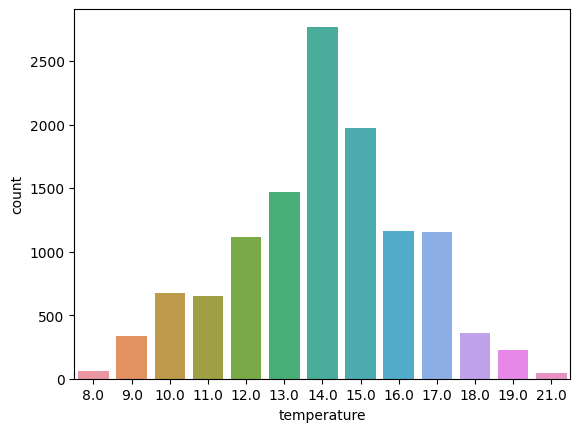

In [ ]:
sns.countplot(data=data, x = 'temperature');

In [ ]:
Q1 = data['temperature'].quantile(0.25)
Q3 = data['temperature'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

2.0

No es necesario quitar los valores de los extremos ya que no se nota gran diferencia

### 3. Humidity

In [ ]:
data['humidity'].value_counts()

44.0    695
41.0    648
67.0    613
63.0    554
69.0    519
66.0    516
54.0    470
46.0    461
70.0    448
52.0    448
56.0    444
55.0    427
43.0    422
60.0    418
65.0    403
53.0    393
64.0    380
62.0    363
48.0    315
59.0    296
58.0    291
47.0    287
51.0    284
49.0    278
68.0    276
50.0    275
45.0    273
42.0    222
57.0    182
61.0    153
40.0    130
71.0    116
72.0      6
Name: humidity, dtype: int64

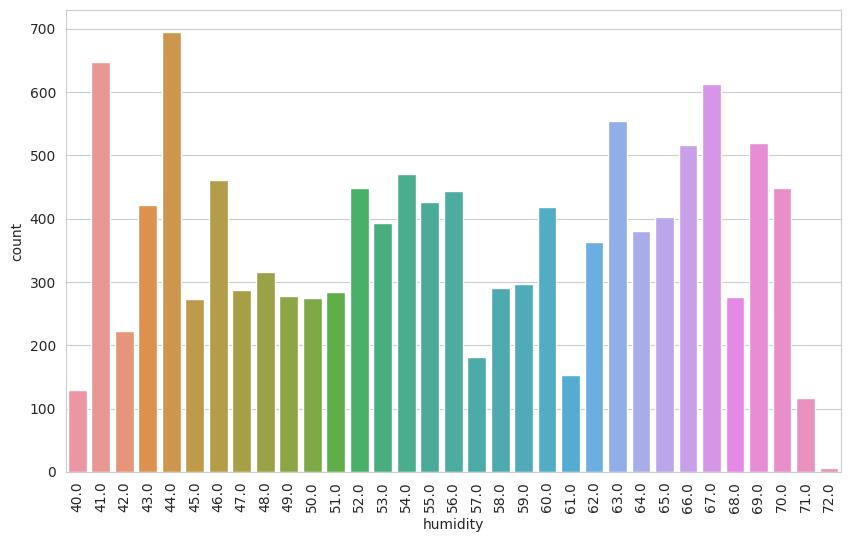

In [ ]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='humidity', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [ ]:
data

,temperature,humidity,date,nombre_finca,Fertilizantes,latitud,longitud,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,13.0,58.0,2018-01-25,"Roberson, Hunter and Webb",No,37.030147,-2.358589,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,13.0,58.0,2018-02-12,Schneider-Rasmussen,No,36.785225,-2.724392,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True
2,13.0,58.0,2018-02-25,"Rodriguez, Montgomery and Valentine",Sí,36.761562,-2.727947,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,True
3,13.0,58.0,2018-04-26,"Rodriguez, Montgomery and Valentine",No,36.852465,-2.452961,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,True
4,13.0,58.0,2018-03-20,Jones-Boyd,Sí,37.123766,-2.399430,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,14.0,58.0,2018-08-10,Schneider-Rasmussen,No,36.779304,-2.468051,Rebelión,6.06,0.37,94.97,12.40,7,Sí,Sí,No,Sí,True
12002,14.0,58.0,2018-04-02,"Murphy, Myers and Mitchell",No,37.178957,-2.589041,Adora,9.32,0.80,85.63,12.88,5,Sí,No,No,Sí,True
12003,14.0,58.0,2018-01-31,Estrada LLC,Sí,36.913094,-2.769802,San Marzano,3.98,0.30,95.54,13.01,10,Sí,Sí,No,Sí,False
12004,14.0,58.0,2018-01-22,Lopez and Sons,Sí,36.965865,-2.494008,San Marzano,4.01,0.30,95.81,14.27,12,Sí,Sí,No,Sí,True


### 4. Date

Eliminamos la columna fecha, porque ya tenemos los marcadores de estación, que indica cuando se puede cultivar este producto

In [ ]:
data = data.drop('date', axis=1)

### 5. Nombre finca

In [ ]:
data['nombre_finca'].value_counts()

Jones-Boyd                             1245
Collins, Shields and Anthony           1232
Estrada LLC                            1225
Nguyen-Thompson                        1208
Strickland-Rose                        1199
Roberson, Hunter and Webb              1196
Lopez and Sons                         1191
Rodriguez, Montgomery and Valentine    1175
Murphy, Myers and Mitchell             1170
Schneider-Rasmussen                    1165
Name: nombre_finca, dtype: int64

Vamos a cambiar el nombre de las fincas únicamente con sus iniciales

Primero reemplazamos los `-` y `,` por ` ` espacios en blanco 

In [ ]:
data['nombre_finca'] = data['nombre_finca'].str.replace('-', ' ')
data['nombre_finca'] = data['nombre_finca'].str.replace(',', ' ')

In [ ]:
data['nombre_finca'] = data['nombre_finca'].str.replace('and', '')

In [ ]:
#Comprobamos el cambio
data['nombre_finca'].value_counts()

Jones Boyd                          1245
Collins  Shields  Anthony           1232
Estrada LLC                         1225
Nguyen Thompson                     1208
Strickl Rose                        1199
Roberson  Hunter  Webb              1196
Lopez  Sons                         1191
Rodriguez  Montgomery  Valentine    1175
Murphy  Myers  Mitchell             1170
Schneider Rasmussen                 1165
Name: nombre_finca, dtype: int64

In [ ]:
data['nombre_finca'] = data['nombre_finca'].apply(lambda x: ' '.join([w[0] for w in x.split()]))


In [ ]:
data.head()

,temperature,humidity,nombre_finca,Fertilizantes,latitud,longitud,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,13.0,58.0,R H W,No,37.030147,-2.358589,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,13.0,58.0,S R,No,36.785225,-2.724392,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True
2,13.0,58.0,R M V,Sí,36.761562,-2.727947,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,True
3,13.0,58.0,R M V,No,36.852465,-2.452961,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,True
4,13.0,58.0,J B,Sí,37.123766,-2.399430,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,True


In [ ]:
data['nombre_finca'].value_counts()

S R      2364
J B      1245
C S A    1232
E L      1225
N T      1208
R H W    1196
L S      1191
R M V    1175
M M M    1170
Name: nombre_finca, dtype: int64

In [ ]:
#Quito los espacios
data['nombre_finca'] = data['nombre_finca'].str.replace(' ', '')

In [ ]:
data['nombre_finca'].value_counts()

SR     2364
JB     1245
CSA    1232
EL     1225
NT     1208
RHW    1196
LS     1191
RMV    1175
MMM    1170
Name: nombre_finca, dtype: int64

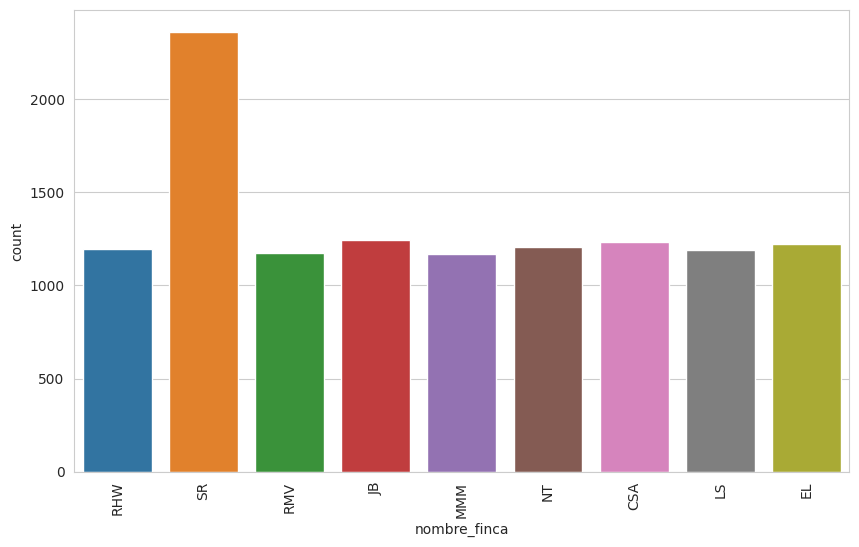

In [ ]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='nombre_finca', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [ ]:
data

,temperature,humidity,nombre_finca,Fertilizantes,latitud,longitud,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,13.0,58.0,RHW,No,37.030147,-2.358589,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,13.0,58.0,SR,No,36.785225,-2.724392,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True
2,13.0,58.0,RMV,Sí,36.761562,-2.727947,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,True
3,13.0,58.0,RMV,No,36.852465,-2.452961,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,True
4,13.0,58.0,JB,Sí,37.123766,-2.399430,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,14.0,58.0,SR,No,36.779304,-2.468051,Rebelión,6.06,0.37,94.97,12.40,7,Sí,Sí,No,Sí,True
12002,14.0,58.0,MMM,No,37.178957,-2.589041,Adora,9.32,0.80,85.63,12.88,5,Sí,No,No,Sí,True
12003,14.0,58.0,EL,Sí,36.913094,-2.769802,San Marzano,3.98,0.30,95.54,13.01,10,Sí,Sí,No,Sí,False
12004,14.0,58.0,LS,Sí,36.965865,-2.494008,San Marzano,4.01,0.30,95.81,14.27,12,Sí,Sí,No,Sí,True


### 6. Fertilizantes

In [ ]:
data['Fertilizantes'].value_counts()

No    8297
Sí    3709
Name: Fertilizantes, dtype: int64

In [ ]:
data['Fertilizantes'] = data['Fertilizantes'].replace({'Sí': 1, 'No': 0})

In [ ]:
data.head()

,temperature,humidity,nombre_finca,Fertilizantes,latitud,longitud,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,13.0,58.0,RHW,0,37.030147,-2.358589,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,13.0,58.0,SR,0,36.785225,-2.724392,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True
2,13.0,58.0,RMV,1,36.761562,-2.727947,Beef,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,True
3,13.0,58.0,RMV,0,36.852465,-2.452961,Pera,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,True
4,13.0,58.0,JB,1,37.123766,-2.399430,Cherry Pera,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,True


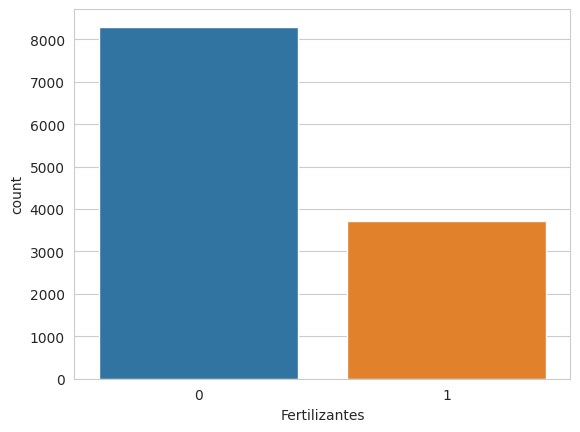

In [ ]:
sns.countplot(data=data, x = 'Fertilizantes');

### 7. Latitud y Longitud

In [ ]:
data['latitud'].value_counts()

37.030147    1
36.833570    1
37.157888    1
36.952298    1
36.818023    1
            ..
36.784484    1
36.827222    1
36.774506    1
37.069401    1
37.178469    1
Name: latitud, Length: 12006, dtype: int64

In [ ]:
data['latitud'].describe()

count    12006.000000
mean        36.950439
std          0.144704
min         36.700015
25%         36.825576
50%         36.950484
75%         37.075854
max         37.199941
Name: latitud, dtype: float64

In [ ]:
data['longitud'].value_counts()

-2.358589    1
-2.380129    1
-2.502565    1
-2.342651    1
-2.459405    1
            ..
-2.452932    1
-2.750456    1
-2.472579    1
-2.234842    1
-2.224973    1
Name: longitud, Length: 12006, dtype: int64

In [ ]:
data['latitud'].describe()

count    12006.000000
mean        36.950439
std          0.144704
min         36.700015
25%         36.825576
50%         36.950484
75%         37.075854
max         37.199941
Name: latitud, dtype: float64

Como podemos observar los valores de la latitud y longitud son lineales y todos oscilan entre un intevalo pequeño, correspondiendo la la latitud y longitud de la ubicación geográfica de Almería

In [ ]:
data.head(2)

,temperature,humidity,nombre_finca,Fertilizantes,latitud,longitud,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,13.0,58.0,RHW,0,37.030147,-2.358589,Rosa,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,13.0,58.0,SR,0,36.785225,-2.724392,Liso,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True


### 8. Tipo

Realizamos una representación gráfica, antes de modificar el nombre

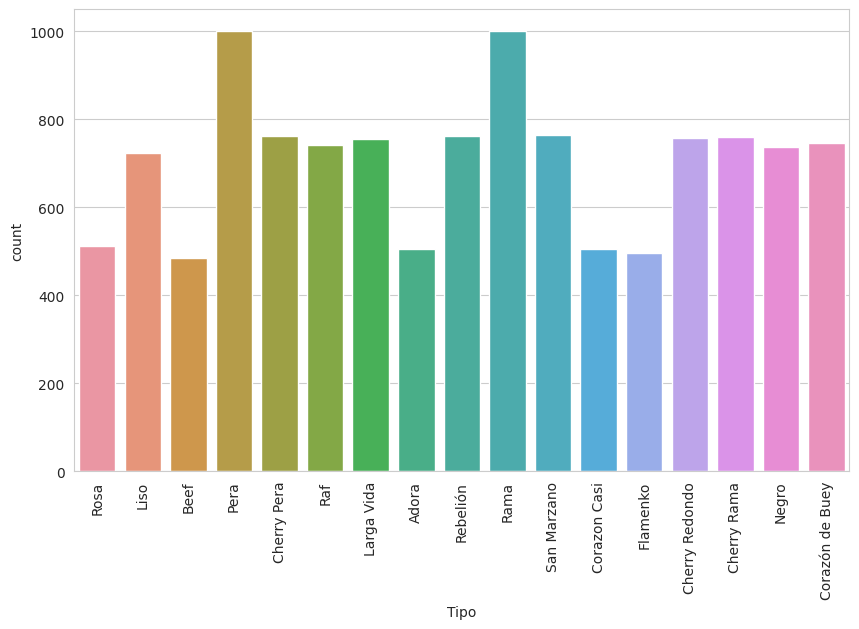

In [ ]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='Tipo', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

Vamos a cambiar cada tipo de tomate por un número para que sea más facil realizar el análisis

In [ ]:
data['Tipo'].unique()

array(['Rosa', 'Liso', 'Beef', 'Pera', 'Cherry Pera', 'Raf', 'Larga Vida',
       'Adora', 'Rebelión', 'Rama', 'San Marzano', 'Corazon Casi',
       'Flamenko', 'Cherry Redondo', 'Cherry Rama', 'Negro',
       'Corazón de Buey'], dtype=object)

In [ ]:
# creamos un diccionario que asigne un número a cada tipo de tomate
tomate_dict = {'Beef': 1, 'Rosa': 2, 'Liso': 3, 'Pera': 4, 'Cherry Pera': 5, 'Adora': 6,
               'San Marzano': 7, 'Raf': 8, 'Larga Vida': 9, 'Rebelión': 10, 'Rama': 11,
               'Corazon Casi': 12, 'Flamenko': 13, 'Cherry Redondo': 14, 'Cherry Rama': 15,
               'Corazón de Buey': 16, 'Negro': 17}

In [ ]:
# reemplazar los nombres de los tipos de tomate con los números correspondientes
data['Tipo'] = data['Tipo'].replace(tomate_dict)


In [ ]:
data.head()

,temperature,humidity,nombre_finca,Fertilizantes,latitud,longitud,Tipo,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,13.0,58.0,RHW,0,37.030147,-2.358589,2,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,13.0,58.0,SR,0,36.785225,-2.724392,3,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True
2,13.0,58.0,RMV,1,36.761562,-2.727947,1,5.59,0.44,96.92,12.70,11,Sí,No,No,Sí,True
3,13.0,58.0,RMV,0,36.852465,-2.452961,4,5.57,0.33,94.04,13.32,6,Sí,Sí,Sí,Sí,True
4,13.0,58.0,JB,1,37.123766,-2.399430,5,7.38,0.53,88.08,15.52,3,Sí,No,Sí,Sí,True


In [ ]:
data['Tipo'].unique()

array([ 2,  3,  1,  4,  5,  8,  9,  6, 10, 11,  7, 12, 13, 14, 15, 17, 16])

Creamos un dataFrame donde se muestre cada ID con su tipo de tomate

In [ ]:
id_tomate = list(range(1, len(tomate_dict)+1))

In [ ]:
nombres_tomate = list(tomate_dict.keys())

In [ ]:
df_tomates = pd.DataFrame({'ID': id_tomate, 'Nombre': nombres_tomate})

In [ ]:
df_tomates

,ID,Nombre
0,1,Beef
1,2,Rosa
2,3,Liso
3,4,Pera
4,5,Cherry Pera
5,6,Adora
6,7,San Marzano
7,8,Raf
8,9,Larga Vida
9,10,Rebelión


Vamos a cambiar el nombre de la columna `Tipo` a `ID`

In [ ]:
data = data.rename(columns={'Tipo': 'ID'})

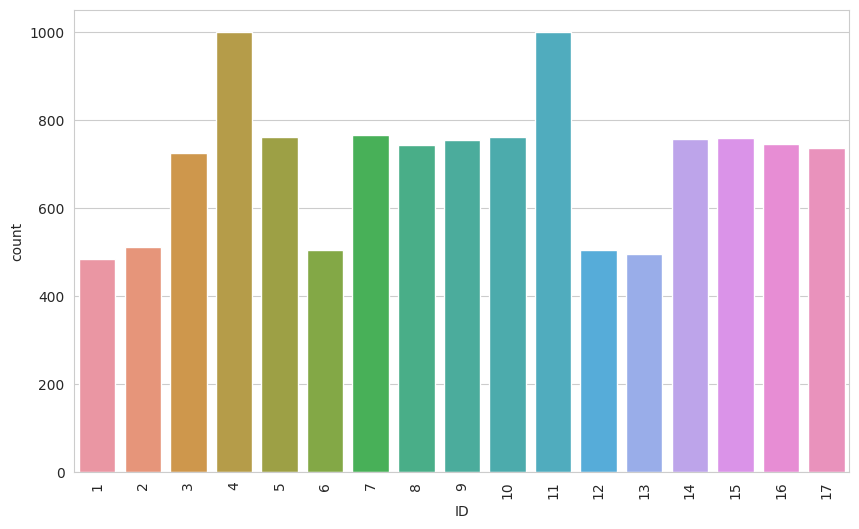

In [ ]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='ID', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [ ]:
data.head(2)

,temperature,humidity,nombre_finca,Fertilizantes,latitud,longitud,ID,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,13.0,58.0,RHW,0,37.030147,-2.358589,2,5.48,0.41,96.80,12.73,8,Sí,No,No,Sí,True
1,13.0,58.0,SR,0,36.785225,-2.724392,3,6.13,0.37,96.22,12.07,9,Sí,No,Sí,Sí,True


### 9. Brix, Acidez, Agua e Índice padurez

Para realizar la limpieza de estos valores, lo único que podemos es sacar sus estadísticas y ya, porque los valores al crearlos nosotros, sabemos que van a estar correctos

In [ ]:
data['Brix'].describe()

count    12006.000000
mean         6.017290
std          1.487633
min          2.410000
25%          5.160000
50%          6.130000
75%          7.080000
max         10.000000
Name: Brix, dtype: float64

In [ ]:
data['Acidez'].describe()

count    12006.000000
mean         0.478490
std          0.182611
min          0.200000
25%          0.330000
50%          0.430000
75%          0.610000
max          1.000000
Name: Acidez, dtype: float64

In [ ]:
data['Agua'].describe()

count    12006.000000
mean        92.951528
std          4.109982
min         81.040000
25%         89.312500
50%         94.410000
75%         95.990000
max         97.900000
Name: Agua, dtype: float64

In [ ]:
data['Índice padurez'].describe()

count    12006.000000
mean        13.093227
std          2.025334
min          7.800000
25%         12.140000
50%         13.110000
75%         14.230000
max         19.900000
Name: Índice padurez, dtype: float64

In [ ]:
data.columns

Index(['temperature', 'humidity', 'nombre_finca', 'Fertilizantes', 'latitud',
       'longitud', 'ID', 'Brix', 'Acidez', 'Agua', 'Índice padurez', 'Calibre',
       'Primavera', 'Verano', 'Otoño', 'Invierno', 'frescura'],
      dtype='object')

### 10. Calibre


In [ ]:
data['Calibre'].value_counts()

7     2079
8     2070
6     1837
9     1519
10     927
3      765
2      760
1      753
11     522
5      279
12     252
13     243
Name: Calibre, dtype: int64

In [ ]:
data['Calibre'].describe()

count    12006.000000
mean         6.910212
std          2.901883
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         13.000000
Name: Calibre, dtype: float64

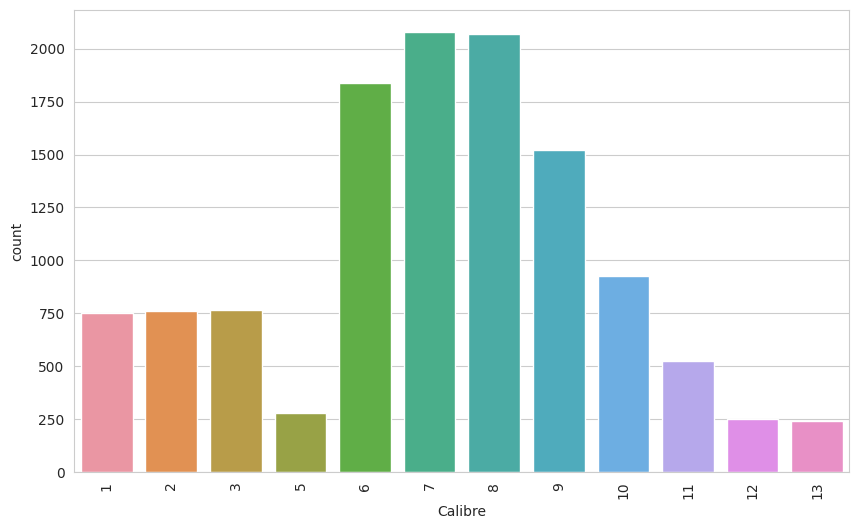

In [ ]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=data, x='Calibre', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

### 11. Verano, Otoño, Invierno y Primavera

Aquí lo que vamos a modificar son los valores de 'Sí' y 'No' por 1 y 0 respectivamente

In [ ]:
data['Verano'] = data['Verano'].replace({'Sí': 1, 'No': 0})

In [ ]:
data['Primavera'] = data['Primavera'].replace({'Sí': 1, 'No': 0})

In [ ]:
data['Otoño'] = data['Otoño'].replace({'Sí': 1, 'No': 0})

In [ ]:
data['Invierno'] = data['Invierno'].replace({'Sí': 1, 'No': 0})

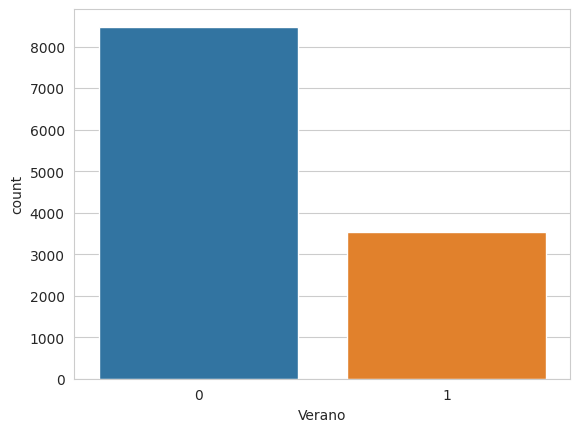

In [ ]:
sns.countplot(data=data, x = 'Verano');

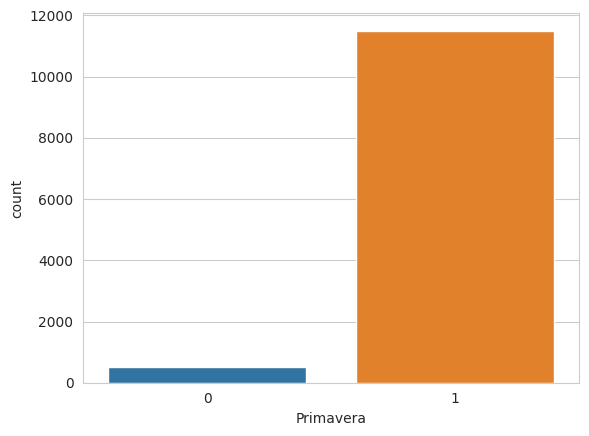

In [ ]:
sns.countplot(data=data, x = 'Primavera');

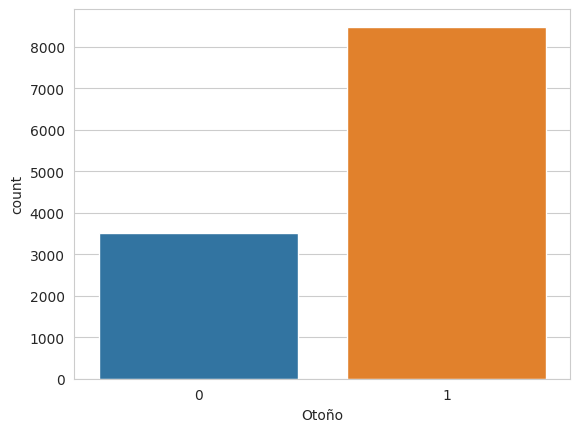

In [ ]:
sns.countplot(data=data, x = 'Otoño');

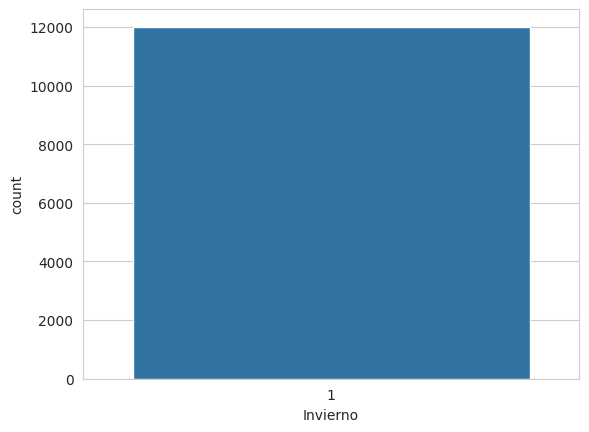

In [ ]:
sns.countplot(data=data, x = 'Invierno');

In [ ]:
data.head()

,temperature,humidity,nombre_finca,Fertilizantes,latitud,longitud,ID,Brix,Acidez,Agua,Índice padurez,Calibre,Primavera,Verano,Otoño,Invierno,frescura
0,13.0,58.0,RHW,0,37.030147,-2.358589,2,5.48,0.41,96.80,12.73,8,1,0,0,1,True
1,13.0,58.0,SR,0,36.785225,-2.724392,3,6.13,0.37,96.22,12.07,9,1,0,1,1,True
2,13.0,58.0,RMV,1,36.761562,-2.727947,1,5.59,0.44,96.92,12.70,11,1,0,0,1,True
3,13.0,58.0,RMV,0,36.852465,-2.452961,4,5.57,0.33,94.04,13.32,6,1,1,1,1,True
4,13.0,58.0,JB,1,37.123766,-2.399430,5,7.38,0.53,88.08,15.52,3,1,0,1,1,True


### 12. Frescura

Este es el valor más importante de todos, porque es el que queremos predecir

In [ ]:
data['frescura'].value_counts()

True     7566
False    4440
Name: frescura, dtype: int64

In [ ]:
data['frescura'].describe()

count     12006
unique        2
top        True
freq       7566
Name: frescura, dtype: object

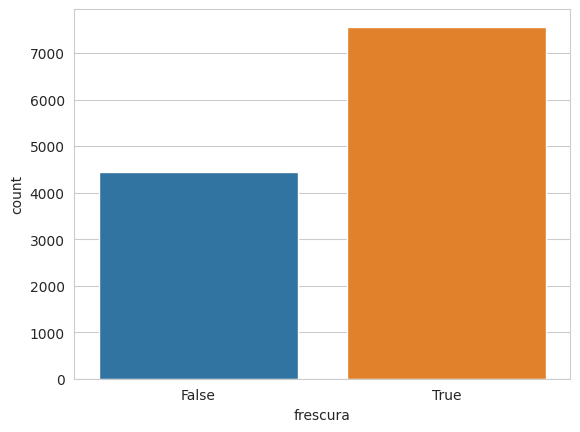

In [ ]:
sns.countplot(data=data, x = 'frescura');

In [ ]:
data['frescura'] = data['frescura'].replace({True : 1, False: 0})

In [ ]:
data['frescura'].value_counts()

1    7566
0    4440
Name: frescura, dtype: int64

### 13. Cambiamos el nombre de las columnas

In [ ]:
data.columns

Index(['temperature', 'humidity', 'nombre_finca', 'Fertilizantes', 'latitud',
       'longitud', 'ID', 'Brix', 'Acidez', 'Agua', 'Índice padurez', 'Calibre',
       'Primavera', 'Verano', 'Otoño', 'Invierno', 'frescura'],
      dtype='object')

In [ ]:
data.columns = ['Temperature', 'Humidity', 'Nombre finca', 'Fertilizantes',
       'Latitud', 'Longitud', 'ID', 'Brix', 'Acidez', 'Agua', 'Índice padurez',
       'Calibre', 'Primavera', 'Verano', 'Otoño', 'Invierno', 'Frescura']

Vamos a cambiar tambien el orden de las columnas

In [ ]:
new_order = [  'Nombre finca', 'Temperature', 'Humidity', 
'Latitud', 'Longitud', 'Brix', 'Acidez', 'Agua', 'Índice padurez', 'Calibre', 'Fertilizantes',
'Primavera', 'Verano', 'Otoño', 'Invierno', 'ID', 'Frescura']

In [ ]:
data = data[new_order]
data.head()

,Nombre finca,Temperature,Humidity,Latitud,Longitud,Brix,Acidez,Agua,Índice padurez,Calibre,Fertilizantes,Primavera,Verano,Otoño,Invierno,ID,Frescura
0,RHW,13.0,58.0,37.030147,-2.358589,5.48,0.41,96.80,12.73,8,0,1,0,0,1,2,1
1,SR,13.0,58.0,36.785225,-2.724392,6.13,0.37,96.22,12.07,9,0,1,0,1,1,3,1
2,RMV,13.0,58.0,36.761562,-2.727947,5.59,0.44,96.92,12.70,11,1,1,0,0,1,1,1
3,RMV,13.0,58.0,36.852465,-2.452961,5.57,0.33,94.04,13.32,6,0,1,1,1,1,4,1
4,JB,13.0,58.0,37.123766,-2.399430,7.38,0.53,88.08,15.52,3,1,1,0,1,1,5,1


In [ ]:
data = data.drop('Nombre finca', axis=1)

In [ ]:
data

,Temperature,Humidity,Latitud,Longitud,Brix,Acidez,Agua,Índice padurez,Calibre,Fertilizantes,Primavera,Verano,Otoño,Invierno,ID,Frescura
0,13.0,58.0,37.030147,-2.358589,5.48,0.41,96.80,12.73,8,0,1,0,0,1,2,1
1,13.0,58.0,36.785225,-2.724392,6.13,0.37,96.22,12.07,9,0,1,0,1,1,3,1
2,13.0,58.0,36.761562,-2.727947,5.59,0.44,96.92,12.70,11,1,1,0,0,1,1,1
3,13.0,58.0,36.852465,-2.452961,5.57,0.33,94.04,13.32,6,0,1,1,1,1,4,1
4,13.0,58.0,37.123766,-2.399430,7.38,0.53,88.08,15.52,3,1,1,0,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,14.0,58.0,36.779304,-2.468051,6.06,0.37,94.97,12.40,7,0,1,1,0,1,10,1
12002,14.0,58.0,37.178957,-2.589041,9.32,0.80,85.63,12.88,5,0,1,0,0,1,6,1
12003,14.0,58.0,36.913094,-2.769802,3.98,0.30,95.54,13.01,10,1,1,1,0,1,7,0
12004,14.0,58.0,36.965865,-2.494008,4.01,0.30,95.81,14.27,12,1,1,1,0,1,7,1


In [ ]:
data.to_csv('/content/drive/MyDrive/UAX/Inteligencia Artificial/Tomates de Almería/Parte 1/Data/Data_cleaned.csv', index=False, sep=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12006 entries, 0 to 12005
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     12006 non-null  float64
 1   Humidity        12006 non-null  float64
 2   Latitud         12006 non-null  float64
 3   Longitud        12006 non-null  float64
 4   Brix            12006 non-null  float64
 5   Acidez          12006 non-null  float64
 6   Agua            12006 non-null  float64
 7   Índice padurez  12006 non-null  float64
 8   Calibre         12006 non-null  int64  
 9   Fertilizantes   12006 non-null  int64  
 10  Primavera       12006 non-null  int64  
 11  Verano          12006 non-null  int64  
 12  Otoño           12006 non-null  int64  
 13  Invierno        12006 non-null  int64  
 14  ID              12006 non-null  int64  
 15  Frescura        12006 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.5 MB


In [ ]:
#Importamos la función
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Seleccionar las columnas numéricas para normalizar
cols_to_normalize = ['Temperature', 'Humidity', 'Latitud', 'Longitud', 'Brix', 'Acidez', 'Agua', 'Índice padurez', 'Calibre', 'ID']

In [ ]:
# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Aplicamos la normalización en las columnas seleccionadas
data[cols_to_normalize] = scaler.fit_transform(data[cols_to_normalize])

In [ ]:
data

,Temperature,Humidity,Latitud,Longitud,Brix,Acidez,Agua,Índice padurez,Calibre,Fertilizantes,Primavera,Verano,Otoño,Invierno,ID,Frescura
0,0.384615,0.5625,0.660363,0.735673,0.404480,0.2625,0.934757,0.407438,0.583333,0,1,0,0,1,2,1
1,0.384615,0.5625,0.170444,0.125955,0.490119,0.2125,0.900356,0.352893,0.666667,0,1,0,1,1,3,1
2,0.384615,0.5625,0.123112,0.120029,0.418972,0.3000,0.941874,0.404959,0.833333,1,1,0,0,1,1,1
3,0.384615,0.5625,0.304945,0.578374,0.416337,0.1625,0.771056,0.456198,0.416667,0,1,1,1,1,4,1
4,0.384615,0.5625,0.847629,0.667600,0.654809,0.4125,0.417556,0.638017,0.166667,1,1,0,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12001,0.461538,0.5625,0.158601,0.553222,0.480896,0.2125,0.826216,0.380165,0.500000,0,1,1,0,1,10,1
12002,0.461538,0.5625,0.958028,0.351557,0.910408,0.7500,0.272242,0.419835,0.333333,0,1,0,0,1,6,1
12003,0.461538,0.5625,0.426220,0.050265,0.206851,0.1250,0.860024,0.430579,0.750000,1,1,1,0,1,7,0
12004,0.461538,0.5625,0.531779,0.509957,0.210804,0.1250,0.876038,0.534711,0.916667,1,1,1,0,1,7,1


In [ ]:
data.to_csv('/content/drive/MyDrive/UAX/Inteligencia Artificial/Tomates de Almería/Parte 1/Data/Data_cleaned_norm.csv', index=False, sep=';')